### This book will show how to use easy_sklearn to build classifier models

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from easy_sklearn import EasySklearnRegressor

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
ds = load_boston()
X = ds.data
y = ds.target
c = ds.feature_names

In [3]:
esc = EasySklearnRegressor()
X_train, X_test, y_train, y_test = esc.split_data(X, y)

In [4]:
print(esc.default_models_name_)

['Lars', 'Knn', 'SVM', 'Ridge', 'Bayers', 'Poly2', 'Lin', 'Tree', 'SGD', 'BAG', 'RF', 'GBDT', 'ADA', 'ET', 'ElasN', 'Lasso']


In [5]:
print(esc.default_scalers_name_)

['scale', 'qt', 'maxabs', 'minmax', 'robust', 'norm']


In [6]:
esc.set(models='',scalers='')
esc.fit(X_train, y_train)

begin train:------------------------------
('traing data shape', (404, 13))
('training scaler:', 'scale')
('find best model', 'scale', 'Lars')
('find best model', 'scale', 'Knn')
('find best model', 'scale', 'Poly2')
('find best model', 'scale', 'BAG')
('find best model', 'scale', 'GBDT')
('training scaler:', 'qt')
('find best model', 'qt', 'GBDT')
('training scaler:', 'maxabs')
('training scaler:', 'minmax')
('training scaler:', 'robust')
('training scaler:', 'norm')
('find best model', 'norm', 'GBDT')

train result:------------------------------
  model  scaler  train_score  valid_score      time
0  GBDT    norm     0.980253     0.873466  0.062994
1  GBDT      qt     0.984043     0.865962  0.056274
2  GBDT  minmax     0.983879     0.864972  0.048580
3  GBDT   scale     0.983879     0.864727  0.061692
4  GBDT  robust     0.983879     0.862354  0.050438
5  GBDT  maxabs     0.983879     0.861339  0.063708
6   BAG  minmax     0.959600     0.847166  0.038644
7   BAG   scale     0.965317  

In [7]:
esc.score(X_test, y_test)


test result:------------------------------
('test data shape:', (102, 13), ' test with:', 'GBDT', 'norm')
(' score:', 0.8932957519462814)


0.8932957519462814


plot learning curve:------------------------------


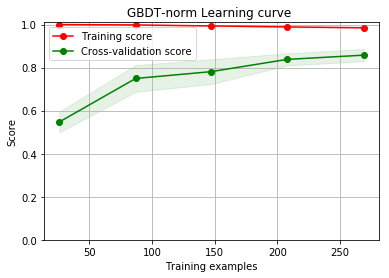

In [8]:
esc.plot_learning_curve()

In [9]:
print(esc.best_model_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


In [10]:
print(esc.best_scaler_)

Normalizer(copy=True, norm='l2')
